# PROBLEM DEFINITION:
# IN THIS PROJECT WE WILL TRY TO PREDICT THE DOCTOR'S CONSULTATION FEES WITH THE GIVEN DATA - SET. WE WILL CONSIDER THE VARIOUS ATTRIBUTES PRESENT IN THE DATA - SET TO BUILD A MACHINE LEARNING MODEL TO PREDICT THE SAME.

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings("ignore")

# LOADING THE DATA-SET

In [2]:
dftr = pd.read_excel (r'D:\Arunkumar M data science\Doctor_fee_consultation\Final Participant Data Folder\Final_Train.xlsx')
dftr

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100


# EXPLORATORY DATA ANALYSIS AND PRE-PROCESSING PIPELINE 

In [3]:
dftr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


# WE WILL NOW REMOVE THE "YEARS EXPERIENCE" AND "%" FROM THE EXPERIENCE AND THE RATING COLUMNS. ALSO WEW ILL SEPERATE THE MAJOR QUALIFICATION WITH RESPECT TO THE QUALIFICATION COLUMN.

In [4]:
dftr["Maj.Qualification"] = dftr["Qualification"].str.split(",").str[0]
dftr["City"] = dftr["Place"].str.split(",").str[1]
dftr

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Maj.Qualification,City
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,BHMS,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,BAMS,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,MBBS,Bangalore
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,BSc - Zoology,Bangalore
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,BAMS,Chennai
...,...,...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300,MBBS,Bangalore
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100,MBBS,Chennai
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600,MBBS,Delhi
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100,MBBS,Mumbai


In [5]:
dftr["Rating"]=dftr["Rating"].str.rstrip("%")
dftr["Experience"]=dftr["Experience"].str.rstrip("years experience")
dftr

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Maj.Qualification,City
0,"BHMS, MD - Homeopathy",24,100,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,BHMS,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12,98,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,BAMS,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,MBBS,Bangalore
3,"BSc - Zoology, BAMS",12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,BSc - Zoology,Bangalore
4,BAMS,20,100,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,BAMS,Chennai
...,...,...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19,98,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300,MBBS,Bangalore
5957,MBBS,33,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100,MBBS,Chennai
5958,MBBS,41,97,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600,MBBS,Delhi
5959,"MBBS, MD - General Medicine",15,90,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100,MBBS,Mumbai


In [6]:
dftr["City"].value_counts()

 Bangalore             1258
 Mumbai                1219
 Delhi                 1184
 Hyderabad              951
 Chennai                855
 Coimbatore             228
 Ernakulam              153
 Thiruvananthapuram      86
 Sector 5                 1
Name: City, dtype: int64

In [7]:
dftr["Maj.Qualification"].value_counts()

MBBS                              2448
BDS                               1208
BAMS                               711
BHMS                               706
MD - Dermatology                    84
                                  ... 
MS - Orthopaedics                    1
Certificate in Dental Implants       1
39 years experience                  1
MBA - Hospital Management            1
D.H.M                                1
Name: Maj.Qualification, Length: 151, dtype: int64

In [8]:
dftr.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Maj.Qualification,City
0,"BHMS, MD - Homeopathy",24,100,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,BHMS,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12,98,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,BAMS,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,MBBS,Bangalore
3,"BSc - Zoology, BAMS",12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,BSc - Zoology,Bangalore
4,BAMS,20,100,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,BAMS,Chennai


# SINCE THE "Place","Miscellaneous_Info","Qualification" COLUMNS ARE NOT REQUIRED FOR FURTHER DATA PRODESSING, WE WILL REMOVE THEM FROM THE GIVEN DATA -SET.

In [9]:
dftr.drop(["Place","Miscellaneous_Info","Qualification"],axis=1,inplace=True)
dftr

,Experience,Rating,Profile,Fees,Maj.Qualification,City
0,24,100,Homeopath,100,BHMS,Ernakulam
1,12,98,Ayurveda,350,BAMS,Bangalore
2,9,NaN,ENT Specialist,300,MBBS,Bangalore
3,12,NaN,Ayurveda,250,BSc - Zoology,Bangalore
4,20,100,Ayurveda,250,BAMS,Chennai
...,...,...,...,...,...,...
5956,19,98,ENT Specialist,300,MBBS,Bangalore
5957,33,NaN,General Medicine,100,MBBS,Chennai
5958,41,97,General Medicine,600,MBBS,Delhi
5959,15,90,General Medicine,100,MBBS,Mumbai


# WE WILL NOW REFINE THE MAJ.QUALIFICATION COLUMN TO ITS MOST IMPORTANT ENTRIES.

In [10]:
dftr["Maj.Qualification"] = dftr["Maj.Qualification"].str.split("-").str[0]
dftr

,Experience,Rating,Profile,Fees,Maj.Qualification,City
0,24,100,Homeopath,100,BHMS,Ernakulam
1,12,98,Ayurveda,350,BAMS,Bangalore
2,9,NaN,ENT Specialist,300,MBBS,Bangalore
3,12,NaN,Ayurveda,250,BSc,Bangalore
4,20,100,Ayurveda,250,BAMS,Chennai
...,...,...,...,...,...,...
5956,19,98,ENT Specialist,300,MBBS,Bangalore
5957,33,NaN,General Medicine,100,MBBS,Chennai
5958,41,97,General Medicine,600,MBBS,Delhi
5959,15,90,General Medicine,100,MBBS,Mumbai


# FINDING NaN VALUES

In [11]:
dftr.isnull().sum()

Experience              0
Rating               3302
Profile                 0
Fees                    0
Maj.Qualification       0
City                   26
dtype: int64

In [12]:
dftr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Experience         5961 non-null   object
 1   Rating             2659 non-null   object
 2   Profile            5961 non-null   object
 3   Fees               5961 non-null   int64 
 4   Maj.Qualification  5961 non-null   object
 5   City               5935 non-null   object
dtypes: int64(1), object(5)
memory usage: 279.5+ KB


# NOW WE WILL FILL TRY TO FILL IN THE NaN VALUES WITH MEAN AND "OTHERS" IN RATING AND CITY RESPECTIVELY.

In [13]:
dftr["Rating"]=dftr["Rating"].astype(float)

In [14]:
dftr["Rating"].fillna(dftr["Rating"].mean(),inplace=True)
dftr["City"].fillna("others",inplace=True)
dftr

,Experience,Rating,Profile,Fees,Maj.Qualification,City
0,24,100.000000,Homeopath,100,BHMS,Ernakulam
1,12,98.000000,Ayurveda,350,BAMS,Bangalore
2,9,94.643475,ENT Specialist,300,MBBS,Bangalore
3,12,94.643475,Ayurveda,250,BSc,Bangalore
4,20,100.000000,Ayurveda,250,BAMS,Chennai
...,...,...,...,...,...,...
5956,19,98.000000,ENT Specialist,300,MBBS,Bangalore
5957,33,94.643475,General Medicine,100,MBBS,Chennai
5958,41,97.000000,General Medicine,600,MBBS,Delhi
5959,15,90.000000,General Medicine,100,MBBS,Mumbai


In [15]:
dftr["City"].unique()

array([' Ernakulam', ' Bangalore', ' Chennai', ' Delhi', ' Hyderabad',
       ' Coimbatore', ' Mumbai', ' Thiruvananthapuram', 'others',
       ' Sector 5'], dtype=object)

# NOW WE WILL USE LABEL ENCODER FOR TRANSFORMING THE STRING VALUES OF THE PROFIE,MAJ QULAIFICATION AND CITY TO A NUMERICAL VALUES.

In [16]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dftr["Profile"]=le.fit_transform(dftr["Profile"])
dftr["Maj.Qualification"]=le.fit_transform(dftr["Maj.Qualification"])
dftr["City"]=le.fit_transform(dftr["City"])


In [17]:
dftr

,Experience,Rating,Profile,Fees,Maj.Qualification,City
0,24,100.000000,5,100,8,4
1,12,98.000000,0,350,5,0
2,9,94.643475,3,300,69,0
3,12,94.643475,0,250,12,0
4,20,100.000000,0,250,5,1
...,...,...,...,...,...,...
5956,19,98.000000,3,300,69,0
5957,33,94.643475,4,100,69,1
5958,41,97.000000,4,600,69,3
5959,15,90.000000,4,100,69,6


<AxesSubplot:xlabel='Rating', ylabel='Density'>

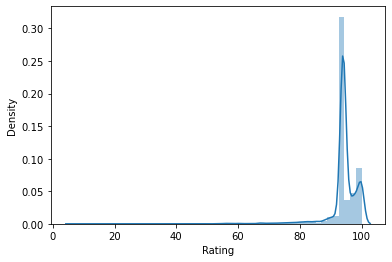

In [68]:
sn.distplot(dftr["Rating"])

<AxesSubplot:xlabel='Fees', ylabel='Density'>

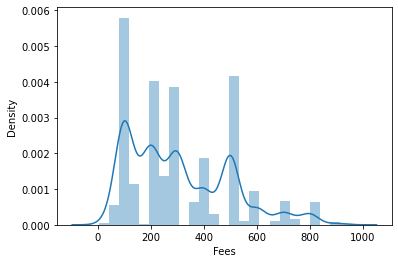

In [70]:
sn.distplot(dftr["Fees"])

# IN THE ABOVE TABLE WE CAN FIND THAT ALL THE COLUMNS NOW HAVE NUMERICAL VALUES.

# BASIC STATISTICAL DATA

In [18]:
dftr.describe()

,Rating,Profile,Fees,Maj.Qualification,City
count,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000
mean,94.643475,2.441872,307.944640,40.500419,3.098977
std,5.244204,1.658014,190.920373,31.453247,2.350982
min,7.000000,0.000000,5.000000,0.000000,0.000000
25%,94.643475,1.000000,150.000000,6.000000,1.000000
50%,94.643475,2.000000,300.000000,69.000000,3.000000
75%,96.000000,4.000000,500.000000,69.000000,5.000000
max,100.000000,5.000000,950.000000,98.000000,9.000000


# CHECKING FOR NaN VALUES

In [19]:
dftr.isnull().sum()

Experience           0
Rating               0
Profile              0
Fees                 0
Maj.Qualification    0
City                 0
dtype: int64

# CHECKING FOR CORRELATION ACROSS THE WHOLE DATA - SET.

<AxesSubplot:>

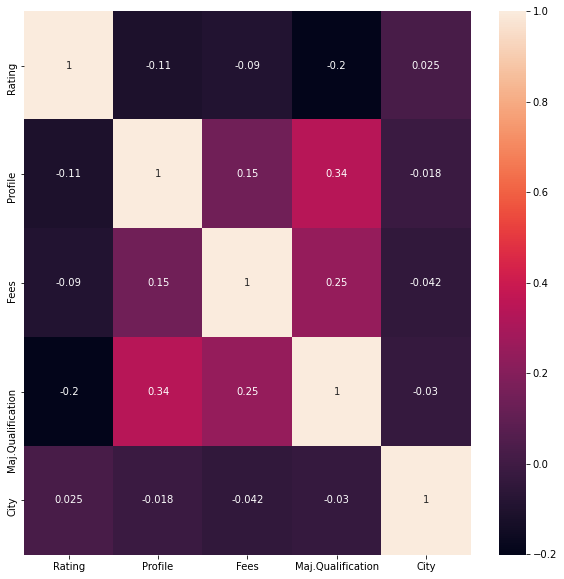

In [20]:
corr=dftr.corr()
plt.figure(figsize=(10,10))
sn.heatmap(corr,annot=True)

In [21]:
dftr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Experience         5961 non-null   object 
 1   Rating             5961 non-null   float64
 2   Profile            5961 non-null   int32  
 3   Fees               5961 non-null   int64  
 4   Maj.Qualification  5961 non-null   int32  
 5   City               5961 non-null   int32  
dtypes: float64(1), int32(3), int64(1), object(1)
memory usage: 209.7+ KB


# WE CAN SEE THAT THE EXPERIENCE COLUMN IS STILL A OBJECT TYPE. NOW WE WILL COVERT IT TO INTEGER TYPE.

In [22]:
dftr["Experience"].astype(int)

0       24
1       12
2        9
3       12
4       20
        ..
5956    19
5957    33
5958    41
5959    15
5960    17
Name: Experience, Length: 5961, dtype: int32

# PLOTTING THE OUTLIERS

<Figure size 5040x3600 with 0 Axes>

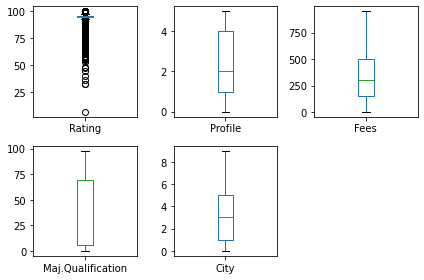

In [23]:
plt.figure(figsize=(70,50))
dftr.plot(kind="box",subplots=True,layout=(2,3))
plt.tight_layout()

In [24]:
dftr=dftr.astype(int)

# IMPLEMENTING Z-SCORE

In [25]:
from scipy.stats import zscore
z=np.abs(zscore(dftr))
z

array([[0.60097885, 1.08745707, 1.54301587, 1.08926083, 1.03337966,
        0.38328623],
       [0.47604029, 0.70675928, 1.47289258, 0.22029544, 1.12876732,
        1.31827343],
       [0.74529508, 0.0546363 , 0.33665249, 0.04161581, 0.90616944,
        1.31827343],
       ...,
       [2.12675597, 0.51641039, 0.93983418, 1.52985171, 0.90616944,
        0.04210368],
       [0.20678551, 0.81603187, 0.93983418, 1.08926083, 0.90616944,
        1.23406607],
       [0.02728232, 1.08745707, 0.86971089, 0.56543832, 1.09697143,
        0.04210368]])

# NOW WE WILL TRY TO REMOVE THE DATA'S WHICH DOESNT FIT IN THE CONDITION.

In [26]:
threshold=3
dftr_new=dftr[(z<3).all(axis=1)]
dftr_new

,Experience,Rating,Profile,Fees,Maj.Qualification,City
0,24,100,5,100,8,4
1,12,98,0,350,5,0
2,9,94,3,300,69,0
3,12,94,0,250,12,0
4,20,100,0,250,5,1
...,...,...,...,...,...,...
5956,19,98,3,300,69,0
5957,33,94,4,100,69,1
5958,41,97,4,600,69,3
5959,15,90,4,100,69,6


# CHECKING FOR SKEWNESS

In [27]:
dftr_new.skew()

Experience           0.918151
Rating              -1.106820
Profile              0.137481
Fees                 0.721378
Maj.Qualification   -0.078054
City                 0.079698
dtype: float64

# PREPARING TRAINING DATA-SET FOR TRAINING AND TESTING

In [31]:
x=dftr_new.drop("Fees",axis=1)
y=dftr_new["Fees"]

# STANDARDISING THE DATA-SET WITH STANDARD SCALER

In [32]:
#USING STANDARD SCALER FOR STANDARDISING THE DATA-SET
from sklearn.preprocessing import StandardScaler
stc=StandardScaler()
x=stc.fit_transform(x)

In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=42)

In [34]:
x_train.shape

(4508, 5)

In [35]:
y_train.shape

(4508,)

In [36]:
x_test.shape

(1272, 5)

In [37]:
y_test.shape

(1272,)

# MACHINE LEARNING MODELS :

# For the above data-set we will use

# 1.LINEAR REGRESSION

# 2.RANDOM FOREST REGRESSOR

# 3.SGD REGRESSOR

# 4.LASSO

# 5.RIDGE

# 6.SVR

In [38]:
#Linear Regression
from sklearn.linear_model import LinearRegression
lr=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
r2score=r2_score(y_test,y_pred)
cvscore=cross_val_score(LinearRegression(),x_train,y_train,cv=5).mean()
print( f"Accuracy={r2score*100},cross_value_score={cvscore*100},and difference={(r2score*100)-(cvscore*100)}")

Accuracy=5.077551043085671,cross_value_score=7.158182516876479,and difference=-2.0806314737908087


In [39]:
#RANDOM FOREST REGRESSOR
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
r2score=r2_score(y_test,y_pred)
cvscore=cross_val_score(rf,x_train,y_train,cv=5).mean()
print( f"Accuracy={r2score*100},cross_value_score={cvscore*100},and difference={(r2score*100)-(cvscore*100)}")

Accuracy=-9.449517477055869,cross_value_score=1.4492210336876843,and difference=-10.898738510743552


In [40]:
#SGD REGRESSOR
from sklearn.linear_model import SGDRegressor
SGD=SGDRegressor()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
r2score=r2_score(y_test,y_pred)
cvscore=cross_val_score(SGD,x_train,y_train,cv=5).mean()
print( f"Accuracy={r2score*100},cross_value_score={cvscore*100},and difference={(r2score*100)-(cvscore*100)}")

Accuracy=5.077551043085671,cross_value_score=7.169851532796476,and difference=-2.092300489710805


In [41]:
#LASSO 
from sklearn.linear_model import Lasso
la=Lasso()
la.fit(x_train,y_train)
y_pred=la.predict(x_test)
r2score=r2_score(y_test,y_pred)
cvscore=cross_val_score(la,x_train,y_train,cv=5).mean()
print( f"Accuracy={r2score*100},cross_value_score={cvscore*100},and difference={(r2score*100)-(cvscore*100)}")

Accuracy=5.036530817840168,cross_value_score=7.181099538183426,and difference=-2.1445687203432584


In [42]:
#RIDGE
from sklearn.linear_model import Ridge
Ri=Ridge()
Ri.fit(x_train,y_train)
y_pred=Ri.predict(x_test)
r2score=r2_score(y_test,y_pred)
cvscore=cross_val_score(Ri,x_train,y_train,cv=5).mean()
print( f"Accuracy={r2score*100},cross_value_score={cvscore*100},and difference={(r2score*100)-(cvscore*100)}")

Accuracy=5.078235419968746,cross_value_score=7.158246168326168,and difference=-2.080010748357422


In [43]:
#SVR
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
y_pred=svr.predict(x_test)
r2score=r2_score(y_test,y_pred)
cvscore=cross_val_score(svr,x_train,y_train,cv=5).mean()
print( f"Accuracy={r2score*100},cross_value_score={cvscore*100},and difference={(r2score*100)-(cvscore*100)}")

Accuracy=6.5935095243911945,cross_value_score=2.9731720564274755,and difference=3.620337467963719


# WE CAN FIND THAT NO MACHINE LEARNING MODELS ARE GIVING A PROMISING ACCURACY VALUES FOR PREDICTION.THE MAX.ACCURACY VALUE WE CAN GET IS 6.59 FROM SVR. THIS MAY HAPPEN WHEN THE DATA-SET IS NOT REFINED OR IF ITS MISSING REQUIRED VALUES. THAT MEANS A LOT OF ENGINEERING IS REQUIRED FOR THE GIVEN DATA-SET.

# SAVING THE MODEL FOR TESTING

In [44]:
import pickle
filename="Doctor_fee_consultation.pkl"
pickle.dump(svr,open(filename,"wb"))

# NOW WE WILL LOAD THE TESTING DATA-SET FOR PREDICTION

In [45]:
dfte = pd.read_excel (r'D:\Arunkumar M data science\Doctor_fee_consultation\Final Participant Data Folder\Final_Test.xlsx')
dfte

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...
...,...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10 years experience,NaN,"Basavanagudi, Bangalore",Ayurveda,NaN
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,NaN,"Choolai, Chennai",Dermatologists,NaN
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,NaN,"Porur, Chennai",General Medicine,NaN
1985,BDS,12 years experience,98%,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...


# WE WILL NOW REMOVE THE "YEARS EXPERIENCE" AND "%" FROM THE EXPERIENCE AND THE RATING COLUMNS. ALSO WEW ILL SEPERATE THE MAJOR QUALIFICATION WITH RESPECT TO THE QUALIFICATION COLUMN.

In [46]:
dfte["Maj.Qualification"] = dfte["Qualification"].str.split(",").str[0]
dfte["City"] = dfte["Place"].str.split(",").str[1]
dfte

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Maj.Qualification,City
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN,MBBS,Mumbai
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN,MBBS,Hyderabad
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai",MBBS,Chennai
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN,BAMS,Delhi
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...,BDS,Bangalore
...,...,...,...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10 years experience,NaN,"Basavanagudi, Bangalore",Ayurveda,NaN,BAMS,Bangalore
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,NaN,"Choolai, Chennai",Dermatologists,NaN,MD - Dermatology,Chennai
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,NaN,"Porur, Chennai",General Medicine,NaN,MBBS,Chennai
1985,BDS,12 years experience,98%,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...,BDS,Bangalore


In [47]:
dfte["Rating"]=dfte["Rating"].str.rstrip("%")
dfte["Experience"]=dfte["Experience"].str.rstrip("years experience")
dfte

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Maj.Qualification,City
0,MBBS,35,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN,MBBS,Mumbai
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN,MBBS,Hyderabad
2,"MBBS, DDVL",40,70,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai",MBBS,Chennai
3,BAMS,0,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN,BAMS,Delhi
4,"BDS, MDS - Conservative Dentistry & Endodontics",16,100,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...,BDS,Bangalore
...,...,...,...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10,NaN,"Basavanagudi, Bangalore",Ayurveda,NaN,BAMS,Bangalore
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4,NaN,"Choolai, Chennai",Dermatologists,NaN,MD - Dermatology,Chennai
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9,NaN,"Porur, Chennai",General Medicine,NaN,MBBS,Chennai
1985,BDS,12,98,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...,BDS,Bangalore


# SINCE THE "Place","Miscellaneous_Info","Qualification" COLUMNS ARE NOT REQUIRED FOR FURTHER DATA PRODESSING, WE WILL REMOVE THEM FROM THE GIVEN DATA -SET.

In [48]:
dfte.drop(["Place","Miscellaneous_Info","Qualification"],axis=1,inplace=True)
dfte

,Experience,Rating,Profile,Maj.Qualification,City
0,35,NaN,General Medicine,MBBS,Mumbai
1,31,NaN,ENT Specialist,MBBS,Hyderabad
2,40,70,Dermatologists,MBBS,Chennai
3,0,NaN,Ayurveda,BAMS,Delhi
4,16,100,Dentist,BDS,Bangalore
...,...,...,...,...,...
1982,10,NaN,Ayurveda,BAMS,Bangalore
1983,4,NaN,Dermatologists,MD - Dermatology,Chennai
1984,9,NaN,General Medicine,MBBS,Chennai
1985,12,98,Dentist,BDS,Bangalore


# WE WILL NOW REFINE THE MAJ.QUALIFICATION COLUMN TO ITS MOST IMPORTANT ENTRIES.

In [49]:
dfte["Maj.Qualification"] = dfte["Maj.Qualification"].str.split("-").str[0]
dfte

,Experience,Rating,Profile,Maj.Qualification,City
0,35,NaN,General Medicine,MBBS,Mumbai
1,31,NaN,ENT Specialist,MBBS,Hyderabad
2,40,70,Dermatologists,MBBS,Chennai
3,0,NaN,Ayurveda,BAMS,Delhi
4,16,100,Dentist,BDS,Bangalore
...,...,...,...,...,...
1982,10,NaN,Ayurveda,BAMS,Bangalore
1983,4,NaN,Dermatologists,MD,Chennai
1984,9,NaN,General Medicine,MBBS,Chennai
1985,12,98,Dentist,BDS,Bangalore


In [50]:
dfte.isnull().sum()

Experience              0
Rating               1090
Profile                 0
Maj.Qualification       0
City                    6
dtype: int64

In [51]:
dfte["Rating"]=dfte["Rating"].astype(float)

# NOW WE WILL FILL TRY TO FILL IN THE NaN VALUES WITH MEAN AND "OTHERS" IN RATING AND CITY RESPECTIVELY.

In [52]:
dfte["Rating"].fillna(dfte["Rating"].mean(),inplace=True)
dfte["City"].fillna("others",inplace=True)
dfte

,Experience,Rating,Profile,Maj.Qualification,City
0,35,94.441472,General Medicine,MBBS,Mumbai
1,31,94.441472,ENT Specialist,MBBS,Hyderabad
2,40,70.000000,Dermatologists,MBBS,Chennai
3,0,94.441472,Ayurveda,BAMS,Delhi
4,16,100.000000,Dentist,BDS,Bangalore
...,...,...,...,...,...
1982,10,94.441472,Ayurveda,BAMS,Bangalore
1983,4,94.441472,Dermatologists,MD,Chennai
1984,9,94.441472,General Medicine,MBBS,Chennai
1985,12,98.000000,Dentist,BDS,Bangalore


# FINDING NaN VALUES

In [53]:
dfte.isnull().sum()

Experience           0
Rating               0
Profile              0
Maj.Qualification    0
City                 0
dtype: int64

# NOW WE WILL USE LABEL ENCODER FOR TRANSFORMING THE STRING VALUES OF THE PROFIE,MAJ QULAIFICATION AND CITY TO A NUMERICAL VALUES.

In [54]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dfte["Profile"]=le.fit_transform(dfte["Profile"])
dfte["Maj.Qualification"]=le.fit_transform(dfte["Maj.Qualification"])
dfte["City"]=le.fit_transform(dfte["City"])

In [55]:
dfte

,Experience,Rating,Profile,Maj.Qualification,City
0,35,94.441472,4,40,6
1,31,94.441472,3,40,5
2,40,70.000000,2,40,1
3,0,94.441472,0,1,3
4,16,100.000000,1,2,0
...,...,...,...,...,...
1982,10,94.441472,0,1,0
1983,4,94.441472,2,42,1
1984,9,94.441472,4,40,1
1985,12,98.000000,1,2,0


In [56]:
dfte.skew()

Experience           0.963447
Rating              -3.808731
Profile              0.028926
Maj.Qualification   -0.198534
City                 0.007716
dtype: float64

# NOW WE WILL USE STANDARD SCALER TO STANDARDISE THE GIVEN DATA- SET .

In [57]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
dfte_new=sc.fit_transform(dfte)
dfte_new

array([[ 1.50699229,  0.        ,  0.90167305,  0.87223237,  1.30119179],
       [ 1.15500055,  0.        ,  0.29700739,  0.87223237,  0.86193456],
       [ 1.94698195, -4.8033641 , -0.30765827,  0.87223237, -0.89509439],
       ...,
       [-0.78095398,  0.        ,  0.90167305,  0.87223237, -0.89509439],
       [-0.51696018,  0.69934037, -0.91232393, -1.12937166, -1.33435162],
       [-0.86895191,  0.        , -0.30765827,  0.87223237, -0.89509439]])

# FITIING THE MODEL AND LOADING THE JOB FILE FOR PREDICTION.

In [58]:
fitted_model=pickle.load(open("Doctor_fee_consultation.pkl","rb"))

In [59]:
fitted_model

SVR()

In [60]:
predictions=fitted_model.predict(dfte_new)

In [61]:
predictions

array([263.20673417, 284.85690553, 279.98022589, ..., 312.63027151,
       206.73081286, 303.61845532])

# CONCLUSION REMARKS:

# WE COULD SEE THAT WE GOT PREDICTION VALUES WE KNOW THAT THE MACHINE LEARNING MODELS WORKS PERFECTLY. BUT THE PRIDICTION    ACCURACY IS FAR LOW THAT IT WONT BE ACCURATE FOR USING IN MAIN STREAM PRODUCITON LINE.THIS HAPPENED BECAUES OF THE FACT THAT THE GIVEN DATA-SET DOESNT CONTAIN TRUE VALUES TO THEIR ATTRIBUTES. THIS EXPLAINS THAT THE DATA-SET NEEDS MORE ENGINEERING TOWARDS IT. MANY TURE VALUES SHOULD BE ADDED IN THE FUTURE.
    